In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from plotly.subplots import make_subplots

In [3]:
data_train = pd.read_csv('data/train.csv').drop('id', axis=1)
data_test = pd.read_csv('data/test.csv').drop('id', axis=1)

In [4]:
all_data = pd.concat([data_train, data_test], axis=0)

In [5]:
data_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,1,0,1,0,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,13,2,0,Class_1
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,1,0,0,0,2,0,0,...,0,0,6,0,0,3,0,0,0,Class_1
99996,0,0,0,0,0,0,0,1,2,0,...,0,2,0,0,0,10,0,0,0,Class_2
99997,0,0,0,0,0,1,0,0,0,4,...,0,0,0,0,1,0,0,2,0,Class_3
99998,0,0,0,0,1,0,0,0,0,5,...,0,0,0,0,0,1,0,4,0,Class_2


<h2>EDA</h2>

<h3>Missing values</h3>

In [5]:
all_data.isnull().sum()

feature_0         0
feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
feature_10        0
feature_11        0
feature_12        0
feature_13        0
feature_14        0
feature_15        0
feature_16        0
feature_17        0
feature_18        0
feature_19        0
feature_20        0
feature_21        0
feature_22        0
feature_23        0
feature_24        0
feature_25        0
feature_26        0
feature_27        0
feature_28        0
feature_29        0
feature_30        0
feature_31        0
feature_32        0
feature_33        0
feature_34        0
feature_35        0
feature_36        0
feature_37        0
feature_38        0
feature_39        0
feature_40        0
feature_41        0
feature_42        0
feature_43        0
feature_44        0
feature_45        0
feature_46        0
feature_47        0
feature_48        0
feature_49        0


As we can see there aren't any missing values in this dataset

<h3>Feature Description</h3>

In [6]:
data_test.describe().T.style.bar(subset=['mean', 'std'], color='#d65f5f')

,count,mean,std,min,25%,50%,75%,max
feature_0,50000.000000,0.254620,0.910607,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,50000.000000,0.443480,2.004536,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,50000.000000,0.116720,0.524807,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,50000.000000,0.584440,1.814083,0.000000,0.000000,0.000000,0.000000,25.000000
feature_4,50000.000000,0.612640,2.819580,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,50000.000000,0.161500,0.605760,0.000000,0.000000,0.000000,0.000000,9.000000
feature_6,50000.000000,0.746000,2.352495,0.000000,0.000000,0.000000,0.000000,25.000000
feature_7,50000.000000,1.238040,2.728055,0.000000,0.000000,0.000000,1.000000,29.000000
feature_8,50000.000000,0.886440,3.364154,0.000000,0.000000,0.000000,0.000000,35.000000
feature_9,50000.000000,0.941920,1.913358,0.000000,0.000000,0.000000,1.000000,16.000000


In [7]:
data_train.describe().T.style.bar(subset=['mean', 'std'], color='#d65f5f')

,count,mean,std,min,25%,50%,75%,max
feature_0,100000.000000,0.257830,0.929033,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,100000.000000,0.431720,1.977862,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,100000.000000,0.114130,0.519584,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,100000.000000,0.590550,1.844558,0.000000,0.000000,0.000000,0.000000,26.000000
feature_4,100000.000000,0.599770,2.785531,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,100000.000000,0.160820,0.601149,0.000000,0.000000,0.000000,0.000000,10.000000
feature_6,100000.000000,0.731490,2.343465,0.000000,0.000000,0.000000,0.000000,27.000000
feature_7,100000.000000,1.228920,2.692732,0.000000,0.000000,0.000000,1.000000,31.000000
feature_8,100000.000000,0.903350,3.415258,0.000000,0.000000,0.000000,0.000000,39.000000
feature_9,100000.000000,0.940120,1.904172,0.000000,0.000000,0.000000,1.000000,17.000000


<h3>Target Distribution</h3>

In [15]:
fig = go.Figure()

to_plot = data_train.value_counts('target')

fig.add_trace(go.Pie(
    labels = to_plot.index,
    values = to_plot.values,
    textinfo='label+percent'
))

fig.update_layout(
    template='plotly_dark',
    title_text = 'Target Distribution'
)

Unfortunately we have huge disbalance in our target variable. We will do something with this if it's gona be a problem later

<h3>Features Distribution</h3>

In [106]:
fig = make_subplots(
    rows=10,
    cols=5,
    subplot_titles=data_train.columns,
)

# Add traces
columns = data_train.drop('target', axis=1).columns.tolist()

for row in range(10):
    for col in range(5):
        column = columns.pop(0)
        to_plot = data_train[column].value_counts()

        fig.add_trace(go.Scatter(
            x = to_plot.index,
            y = to_plot.values,
            name = column,
            mode='lines'
        ), col=col+1, row=row+1)

        fig.update_yaxes(title='y', visible=False, showticklabels=False)

        if(col+1 == 5):
            break

fig.update_layout(
    height=1000,
    width=700,
    showlegend=False,
    template='plotly_dark',
)
fig.update_annotations(font_size=12)

There is a lot of zero values in every feature. I'm curious how much of dataset is filled with them.

In [72]:
to_plot = data_train.drop('target', axis=1).isin([0]).sum(axis=0)
percent = np.array(to_plot)/100000 * 100

fig = go.Figure()

fig.add_trace(go.Bar(
    x = to_plot.values,
    y = to_plot.index,
    orientation='h',
    text = np.round(percent, 2),
    textposition='outside',
    marker={
        'color': to_plot.values,
        'colorscale': 'Purples',

    }
))

fig.update_layout(
    height=1000,
    width=700,
    template='plotly_dark',
    title_text='Percent of zeros in every column'
)

<h3>Correlation</h3>

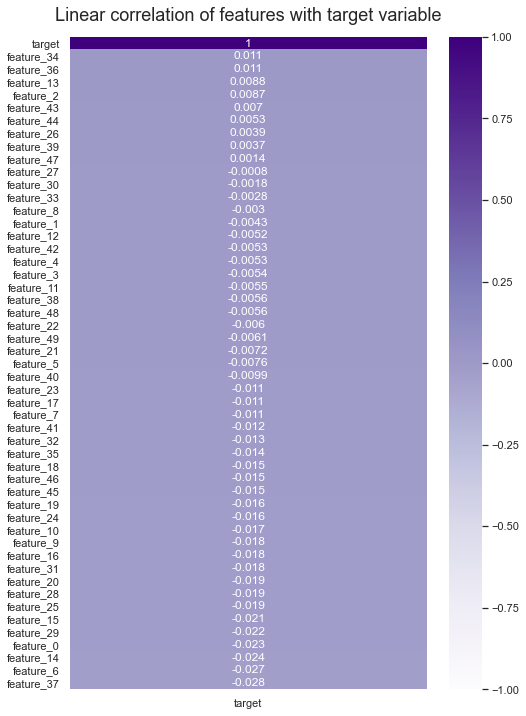

In [101]:
data_train_target_num = data_train.replace({'target': {'Class_1': 1, 'Class_2': 2, 'Class_3': 3, 'Class_4': 4}})

plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(data_train_target_num.corr()[['target']].sort_values(by='target', ascending=False),
                     vmin=-1, vmax=1, annot=True, cmap='Purples')

heatmap.set_title('Linear correlation of features with target variable', fontdict={'fontsize': 18}, pad=16);

<h3>Conclusion</h3>

After some visualization and discussion couple of things come up to the light
<ul>
    <li>There aren't any missing values</li>
    <li>Mean and standard deviation is fairly the same for train and test datasets</li>
    <li>Target variable is unbalanced which can be a problem</li>
    <li>Features are left skewed and nearly 60% of every feature is filled with zeros</li>
    <li>Features show weak linear correlation with target variable</li>
</ul>

<h2>Dimensionality Reduction</h2>
There is 50 features in our dataset. It's good opportunity to perform dimensionality reduction but first we gona check if it's necessary to do so.